<b>Observations :</b>
<ol>
<li>Survival Chances are more for passengers with Pclass in order 1 > 2 > 3.</li>
<li>Females have more chances of survival than males.</li>
</ol> 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 

In [2]:
df1 = pd.read_csv(r'D:\Kaggle\Titanic - Machine Learning from Disaster\Dataset\train.csv')
print(df1.shape)

(891, 12)


In [3]:
df2 = df1.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis="columns")
df3 = df2.dropna()
print(df3.shape)

(712, 8)


In [4]:
df3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
# Checking Classes 

df_class = df3[["Survived", "Pclass"]]
df_class.value_counts()

Survived  Pclass
0         3         270
1         1         120
0         2          90
1         3          85
          2          83
0         1          64
Name: count, dtype: int64

Observation 1 : Survival Chances are more for passengers with Pclass in order 1 > 2 > 3.

In [6]:
# Checking Sex

df_sex = df3[["Survived", "Sex"]]
df_sex.value_counts()

Survived  Sex   
0         male      360
1         female    195
          male       93
0         female     64
Name: count, dtype: int64

Observation 2 : Females have more chances of survival than males.

In [7]:
# Checking age

df_age = df3[["Survived", "Age"]]
df_age.describe(percentiles=[0.9])

,Survived,Age
count,712.000000,712.000000
mean,0.404494,29.642093
std,0.491139,14.492933
min,0.000000,0.420000
50%,0.000000,28.000000
90%,1.000000,50.000000
max,1.000000,80.000000


C:\Users\asus\AppData\Local\Temp\ipykernel_32536\471418399.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age.loc[:, 'Age Group'] = pd.cut(df_age['Age'], bins=bins, labels=labels, right=False)
C:\Users\asus\AppData\Local\Temp\ipykernel_32536\471418399.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate = df_age.groupby('Age Group')['Survived'].mean()


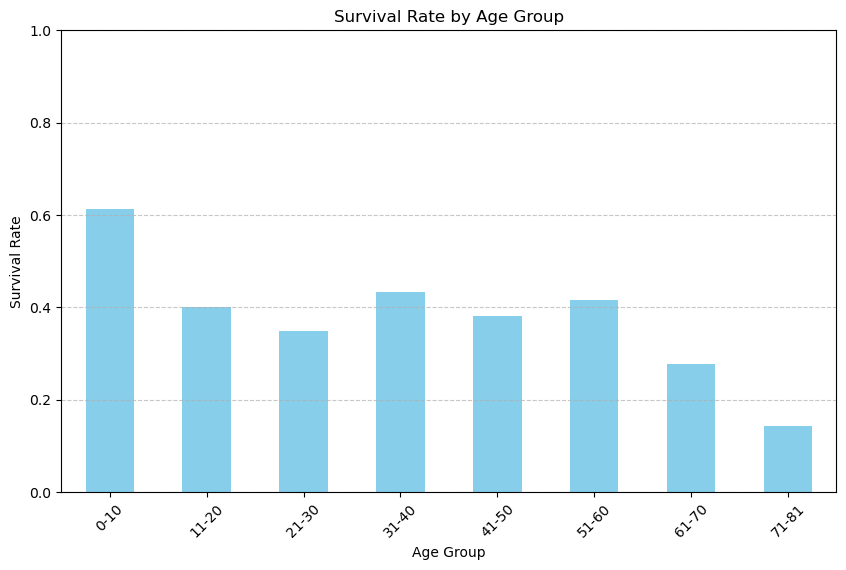

In [8]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 81]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-81']
df_age.loc[:, 'Age Group'] = pd.cut(df_age['Age'], bins=bins, labels=labels, right=False)
survival_rate = df_age.groupby('Age Group')['Survived'].mean()
plt.figure(figsize=(10, 6))
survival_rate.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Survival rate ranges from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [9]:
df_age[(df_age.Age<=19) & (df_age.Survived==1)].shape[0]

79

In [10]:
df_age[df_age.Age<=19].count()

Survived     164
Age          164
Age Group    164
dtype: int64

In [11]:
df3[df3.Survived==1].count()

Survived    288
Pclass      288
Sex         288
Age         288
SibSp       288
Parch       288
Fare        288
Embarked    288
dtype: int64